# Fourier Series

Periodic functions can be represented as (potentially infinite) sums of sines and cosines.

More precisely, if $f$ has period $2\pi$, there are unique $a_n$, $b_n$ such that

$$f(t) = {a_0\over 2} + \sum_{k=1}^{+\infty}(a_k\cos(kt) + b_k\sin(kt))$$ 

This representation of $f$ is called the Fourier series of $f$.

We can use the first few terms of the Fourier series as an approximation of the function:

In [1]:
from numpy import sin, cos

# Evaluates a function based on its first n+1 Fourier coefficients.
# The function is computed at the points in t.
def evaluate_from_fourier_coefficients(fourier_coefficients, n, t):
    # Note that we don't use b0.
    a0, b0 = fourier_coefficients(0)
    y = [a0/2 for i in t]
    for i in range(1, n + 1):
        a, b = fourier_coefficients(i)
        y += a*cos(i*t) + b*sin(i*t)
    return y

## Time and frequency domains

The function $f$ can be seen as:
* a function in the time domain
* or as the same function in the frequency domain, mapping frequencies $k\over 2\pi$ to $a_k$ and $b_k$.

We can draw the 2 representations based on the Fourier coefficients of $f$.

In [2]:
from numpy import pi, arange
from matplotlib.pyplot import figure, show

# Draws a function based on the first n+1 Fourier coefficients of the 
# function.
def draw_time_domain(fourier_coefficients, n, fig):
    ax = fig.add_subplot(221)
    ax.set_xticks([i*pi for i in range(5)])
    ax.set_xticklabels(["0", r"$\pi$", r"$2\pi$", r"$3\pi$", r"$4\pi$"])
    # Choose a range slightly larger than twice the period.
    eps = 0.05
    period = 2*pi
    t = arange(-eps, 2*period + eps, 0.001)
    ax.plot(t, evaluate_from_fourier_coefficients(fourier_coefficients, n, t))
    ax.grid(True)

# Draws a map from frequency to amplitude.
def draw_frequency_domain(fourier_coefficients, n, fig):
    ax = fig.add_subplot(222)
    coefficients_array = [fourier_coefficients(i) for i in range(1, n+1)]
    ax.plot(range(1, n+1), coefficients_array)
    ax.grid(True)

def draw_fourier(fourier_coefficients):
    fig = figure()
    draw_time_domain(fourier_coefficients, 10000, fig)
    draw_frequency_domain(fourier_coefficients, 50, fig)

## Examples

### Square Wave

The Fourier series of the square wave is
$$f(x) = \sin(x) + {\sin(3x)\over 
3} + {\sin(5x)\over 5} + \cdots$$ that is:

In [3]:
def square_fourier_coefficients(i):
    a, b = 0, 0
    if i % 2 == 1:
        b = 1/i
    return a, b

This function can be represented in the time and frequency domains as follows:

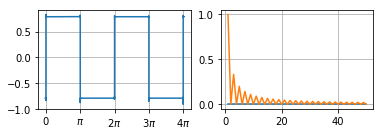

In [4]:
draw_fourier(square_fourier_coefficients)

It's interesting to see how successive sums approximate the function:

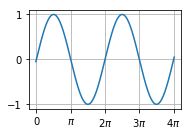

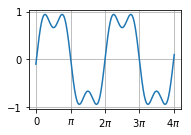

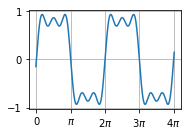

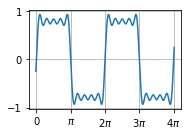

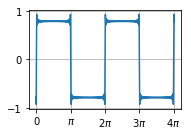

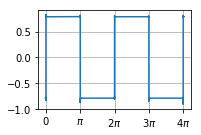

In [5]:
for i in [1, 3, 5, 10, 100, 10000]:
    fig = figure()
    draw_time_domain(square_fourier_coefficients, i, fig)
    show()

### Sawtooth

$$f(x) = \sin(x) + {\sin(2x)\over 2} + {\sin(3x)\over 3} + \cdots$$

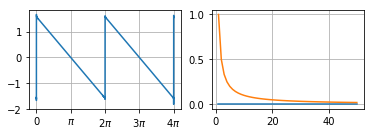

In [6]:
def sawtooth_fourier_coefficients(i):
    a, b = 0, 0
    if i > 0:
        b = 1/i
    return a, b

draw_fourier(sawtooth_fourier_coefficients)

### Step

$$f(x) = \sin(x) + {\sin(2x)\over 2} + {\sin(4x)\over 4} + {\sin(5x)\over 5} + {\sin(7x)\over 7} + \cdots$$

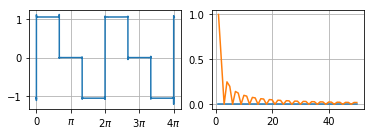

In [7]:
def step_fourier_coefficients(i):
    a, b = 0, 0
    if i % 3 != 0:
        b = 1/i
    return a, b

draw_fourier(step_fourier_coefficients)

### Parabola

$$f(x) = \cos(x) + {\cos(2x)\over 4} + {\cos(3x)\over 9} + \cdots$$

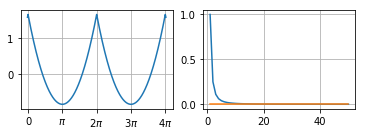

In [8]:
def parabola_fourier_coefficients(i):
    a, b = 0, 0
    if i > 0:
        a = 1/i**2
    return a, b

draw_fourier(parabola_fourier_coefficients)

### Pulse

$$f_\alpha(x) = {\sin(\alpha)\over 1}\cos(x) + {\sin(2\alpha)\over 2}\cos(2x) + {\sin(3\alpha)\over 3}\cos(3x) + \cdots$$

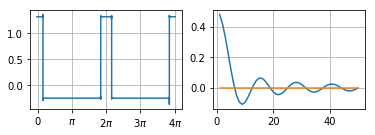

In [9]:
# For alpha = 0.5.
def pulse_fourier_coefficients(i):
    alpha = 0.5
    a, b = 0, 0
    if i > 0:
        a = sin(i*alpha)/i
    return a, b

draw_fourier(pulse_fourier_coefficients)

## Computing the Fourier coefficients

It can be easily shown that:

\begin{align*}
a_0 & = {1\over \pi}\int_{-\pi}^{\pi}f(x)dx \\
k\ge 1, a_k & = {1\over \pi}\int_{-\pi}^{\pi}f(x)\cos(kx)dx \\
k\ge 1, b_k & = {1\over \pi}\int_{-\pi}^{\pi}f(x)\sin(kx)dx
\end{align*}

Using the formulas above, we can calculate the Fourier coefficients of periodic functions.

Let's take as an example, the triangle wave which is the periodic function defined by: $f(t) = |t|$ over $(-\pi, \pi)$.

In [10]:
from sympy import integrate, Symbol
import sympy

x = Symbol('x', real=True)
k = Symbol('k', integer=True, nonzero=True)

Pi = sympy.pi
Cos = sympy.cos(k*x)
Sin = sympy.sin(k*x)

(integrate(-x, (x, -Pi, 0)) + integrate(x, (x, 0, Pi)))/(2*Pi)

pi/2

$\implies a_0={\pi\over 2}$

In [11]:
(integrate(-x*Cos, (x, -Pi, 0)) + integrate(x*Cos, (x, 0, Pi)))/Pi

(2*(-1)**k/k**2 - 2/k**2)/pi

$\implies a_k=-{4\over \pi k^2}$ for $k$ odd ($0$ for $k$ even)

In [12]:
k = Symbol('k', integer=True, nonzero=True)

(integrate(-x*Sin, (x, -Pi, 0)) + integrate(x*Sin, (x, 0, Pi)))/Pi

0

$\implies b_k=0$

That is,

$$f(x) = {\pi \over 2} - {4\over{\pi}}\cos(x) - {4\over{9\pi}}\cos(3x) - {4\over{25\pi}}\cos(5x) - \cdots$$

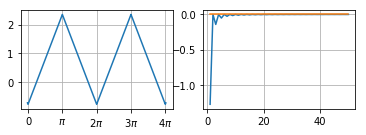

In [13]:
def triangle_fourier_coefficients(i):
    a, b = 0, 0
    if i == 0:
        a = pi/2
    if i%2 == 1:
        a = -4/(pi*i*i)
    return a, b

draw_fourier(triangle_fourier_coefficients)

## Approximating the Fourier coefficients

Let's say that for some reason, we cannot find closed formulas for $a_k$ and $b_k$: maybe we don't know how to deal with the specific integrals, or maybe we only have access to samples of the function.

We can still estimate the Fourier coefficients, by approximating the integrals with sums:


\begin{align*}
a_0 & = {1\over \pi}\sum_{i = 0}^{N-1}f(-\pi + {i2\pi\over N}){2\pi\over N}dx = {2\over N}\sum_{i = 0}^{N-1}f(-\pi + {i2\pi\over N}) \\
k\ge 1, a_k & = {2\over N}\sum_{i = 0}^{N-1}f(-\pi + {i2\pi\over N})\cos(k(-\pi + {i2\pi\over N})) \\
k\ge 1, b_k & = {2\over N}\sum_{i = 0}^{N-1}f(-\pi + {i2\pi\over N})\sin(k(-\pi + {i2\pi\over N}))
\end{align*}

Let's pretend for example that we don't know how to integrate the triangle function. We can still estimate the fourier coefficients and therefore the function from samples:

In [14]:
def triangle(x):
    x = abs(x - pi) % (2*pi)
    x = abs(-x + pi)
    return x

def appr_a(f, k, N):
    S = 0
    for i in range(N):
        x = -pi + i*2*pi/N
        S += f(x)*cos(k*x)
    S *= 2/N
    return S

def appr_b(f, k, N):
    S = 0
    for i in range(N):
        x = -pi + i*2*pi/N
        S += f(x)*sin(k*x)
    S *= 2/N
    return S

def appr_coefficients(f):
    def tmp(i):
        return appr_a(f, i, 128), appr_b(f, i, 128)
    return tmp

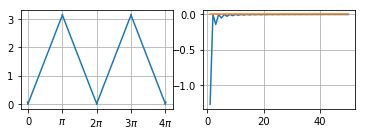

In [15]:
fig = figure()
draw_time_domain(appr_coefficients(triangle), 100, fig)
draw_frequency_domain(appr_coefficients(triangle), 50, fig)

## $cos^4(x)$

As an interesting application, by expanding $cos^4(x)$ in its Fourier coefficients, we can see, without using any trigonometry, that:

$$cos^4x = {3\over 4} + {1\over 2}cos(2x) + {1\over 8}cos(4x)$$

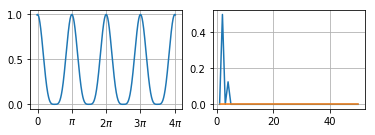

0 (0.7499999999999996, 0.0)
1 (4.683753385137379e-17, 2.5261910618912253e-17)
2 (0.49999999999999983, 1.6263032587282567e-17)
3 (1.0234868508263162e-16, -3.209238430557093e-17)
4 (0.12499999999999988, 4.206704429243757e-17)
5 (6.765421556309548e-17, -4.163336342344337e-17)
6 (-1.97758476261356e-16, 1.1622647289044608e-16)
7 (8.500145032286355e-17, -1.9081958235744878e-17)
8 (-2.2898349882893854e-16, 7.719519468096792e-17)
9 (8.500145032286355e-17, -1.0061396160665481e-16)
10 (-7.45931094670027e-17, -7.806255641895632e-18)
11 (-1.0581813203458523e-16, -7.632783294297951e-17)
12 (-1.491862189340054e-16, -1.0408340855860843e-17)
13 (3.469446951953614e-18, 9.367506770274758e-17)
14 (6.765421556309548e-17, 1.734723475976807e-17)
15 (1.457167719820518e-16, -5.377642775528102e-17)
16 (-3.122502256758253e-17, -5.204170427930421e-18)
17 (1.7867651802561113e-16, -5.204170427930421e-18)
18 (-1.5439038936193583e-16, 9.194034422677078e-17)
19 (1.1622647289044608e-16, -2.237793284010081e-16)


In [16]:
def cos4(x):
    return cos(x)**4

fig = figure()
draw_time_domain(appr_coefficients(cos4), 100, fig)
draw_frequency_domain(appr_coefficients(cos4), 50, fig)
show()

for k in range(0, 20):
    now = appr_coefficients(cos4)(k)
    print(k, now)